# Syed Muhammad Zain Computer Vision Deep Learning Model


## Importing libraries

In [ ]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import *
from keras.utils import np_utils
from keras.optimizers import Adam
from tqdm import tqdm
import seaborn as sns
import numpy as np
import numpy as np
import pandas as pd
import os
from keras.layers import (Dropout, Input, Dense, Conv2D, 
                          MaxPooling2D, GlobalAveragePooling2D, 
                          UpSampling2D, Conv2DTranspose, 
                          Reshape, Flatten, Activation, 
                          BatchNormalization)
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.layers.advanced_activations import LeakyReLU
from keras.initializers import RandomNormal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


## Exploratory Data Analysis

In [3]:
Train_data1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-train.csv', header=None)

In [4]:
Train_data1.shape

(112800, 785)

In [5]:
#splitting data into xtrain and ytrain
trainingy=Train_data1[[0]]
trainingx=Train_data1.drop([0],axis=1)
print(trainingy.shape)
print(trainingx.shape)

(112800, 1)
(112800, 784)


In [6]:
#converting to series
trainingy=Train_data1[0]
trainingy.shape

(112800,)

In [7]:
mapping=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
mapping.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [8]:
mappingdict = {}
for i,L in enumerate(mapping):
    mappingdict[i] = chr(L)

mappingdict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [9]:
def correctingimage(imageforcorrection):
    imageforcorrection = imageforcorrection.reshape(28, 28)
    imageforcorrection = np.fliplr(imageforcorrection)
    imageforcorrection = np.rot90(imageforcorrection)
    return imageforcorrection

In [10]:
trainingx = np.apply_along_axis(correctingimage, 1, trainingx)
trainingx.shape

(112800, 28, 28)

In [11]:
#normalizing x and one hot encoding y both are not dataframes
def preprocess(x):    
    x = x.reshape(-1, 28, 28, 1) #-1 means number of examples are undefined/unknown
    x = np.float64(x)
    x = (x / 255 - 0.5) * 2
    x = np.clip(x, -1, 1)
    return x

In [12]:
trainingx=preprocess(trainingx)

In [13]:
print(trainingx.max(),trainingx.min())

1.0 -1.0


In [14]:
gopt = Adam(0.00001, 0.5)
dopt = Adam(0.00002, 0.5)
ND = 100


## Training and testing

In [15]:
def Gena():

    convmodel = Sequential()

    convmodel.add(Dense(1024, input_dim=ND))
    convmodel.add(BatchNormalization(momentum=0.8))
    convmodel.add(Activation("relu"))
    
    convmodel.add(Dense(4900, input_dim=ND))
    convmodel.add(BatchNormalization(momentum=0.8))
    convmodel.add(Activation("relu"))
    
    convmodel.add(Reshape((7, 7, 100)))
    
    convmodel.add(UpSampling2D((2, 2)))
    convmodel.add(Conv2D(64, (2, 2), padding='same', 
                     kernel_initializer=RandomNormal(0, 0.02)))
    convmodel.add(BatchNormalization(momentum=0.8))
    convmodel.add(LeakyReLU(0.2))
    convmodel.add(UpSampling2D((2, 2)))
   
    convmodel.add(Conv2D(1, (3, 3), padding='same', activation = "tanh", 
                     kernel_initializer=RandomNormal(0, 0.02)))
    
    return convmodel

In [16]:
def Disc():
    convmodel = Sequential()
    
    convmodel.add(Conv2D(64, (2, 2), strides=2, padding='same', 
                     kernel_initializer=RandomNormal(0, 0.02), 
                     input_shape=(28, 28, 1)))
    convmodel.add(LeakyReLU(0.2))
    
    convmodel.add(Conv2D(128, (2, 2), strides=2, 
                     kernel_initializer=RandomNormal(0, 0.02)))
    convmodel.add(LeakyReLU(0.2))
    convmodel.add(Conv2D(256, (2, 2), strides=1, 
                     kernel_initializer=RandomNormal(0, 0.02)))
    convmodel.add(Flatten())
    
    
    convmodel.add(Dense(64))
    convmodel.add(Dense(64))
    convmodel.add(LeakyReLU(0.2))
    
    convmodel.add(Dropout(0.5))
    convmodel.add(Dense(1, activation='softmax'))
    
    convmodel.compile(loss='binary_crossentropy', optimizer=dopt)
    return convmodel

In [17]:
G = Gena()
G.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              103424    
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4900)              5022500   
_________________________________________________________________
batch_normalization_1 (Batch (None, 4900)              19600     
_________________________________________________________________
activation_1 (Activation)    (None, 4900)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 100)         0

In [18]:
D= Disc()
D.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 64)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         32896     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 256)         131328    
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [19]:
noisegenerated = Input(shape=(ND,))
fake_data_generated = G(noisegenerated )
D.trainable = False
OUTPUT1 = D(fake_data_generated)
DCGAN=Model(noisegenerated , OUTPUT1)
DCGAN.compile(loss='binary_crossentropy', optimizer=gopt)
 





In [20]:
FN= np.random.normal(0, 1, size=(30, ND))


In [21]:
def show_results(title, epoch):
    imgs = G.predict(FN)
    imgs = 0.5 * imgs + 0.5
    plt.figure(figsize=(11,11))
    
    i = 1
    for img in imgs:
        plt.subplot(10, 10, i)
        plt.imshow(img.reshape((28,28)), cmap='gray')
        plt.axis('off')
        i+=1
    plt.suptitle(title, fontsize = 15)
    plt.savefig(str(epoch)+".png", transparent=True)
    plt.show()

In [22]:
epochs = 51
batch_size = 128
steps_per_epoch = len(trainingx)//batch_size

current epouch is:  0
discriminator loss currently is :  0.6016141772270203
generator loss currently is:  1.1220769882202148
--------------------------------------------------------------------------------


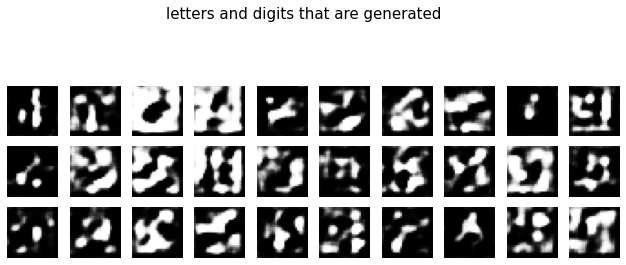

current epouch is:  1
discriminator loss currently is :  0.6417657136917114
generator loss currently is:  0.8098002672195435
--------------------------------------------------------------------------------
current epouch is:  2
discriminator loss currently is :  0.6355898380279541
generator loss currently is:  0.8174725770950317
--------------------------------------------------------------------------------
current epouch is:  3
discriminator loss currently is :  0.6541732549667358
generator loss currently is:  0.9508562088012695
--------------------------------------------------------------------------------
current epouch is:  4
discriminator loss currently is :  0.6449404954910278
generator loss currently is:  0.944735586643219
--------------------------------------------------------------------------------
current epouch is:  5
discriminator loss currently is :  0.6620026230812073
generator loss currently is:  0.9317996501922607
----------------------------------------------------

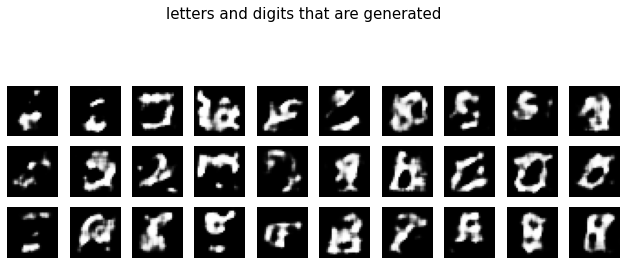

current epouch is:  6
discriminator loss currently is :  0.6417918801307678
generator loss currently is:  0.7984833717346191
--------------------------------------------------------------------------------
current epouch is:  7
discriminator loss currently is :  0.6451477408409119
generator loss currently is:  0.8118622303009033
--------------------------------------------------------------------------------
current epouch is:  8
discriminator loss currently is :  0.6458953022956848
generator loss currently is:  0.7555490136146545
--------------------------------------------------------------------------------
current epouch is:  9
discriminator loss currently is :  0.6397930383682251
generator loss currently is:  0.812670886516571
--------------------------------------------------------------------------------


In [ ]:
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        inputgenerator = np.random.normal(0, 1, size=(batch_size, ND))
        fakedataG = G.predict(inputgenerator)
        realdataG = trainingx[np.random.randint(0, trainingx.shape[0], size=batch_size)]
        realdataG = realdataG.reshape((batch_size, 28, 28, 1))
        inputdiscriminator= np.concatenate((realdataG , fakedataG))
        labeldiscriminator = np.zeros(2*batch_size)
        labeldiscriminator[:batch_size] = 0.75
        labeldiscriminator[batch_size:] = 0.25
        lossdiscriminator= D.train_on_batch(inputdiscriminator, labeldiscriminator)
        labelgenerator= np.ones(batch_size)
        lossgenerator = DCGAN.train_on_batch(inputgenerator, labelgenerator)

    print("current epouch is: ", epoch)
    print("discriminator loss currently is : ", lossdiscriminator)
    print("generator loss currently is: ", lossgenerator)
    print("-"*80)
    
    if epoch % 5 == 0:
        show_results("letters and digits that are generated", epoch)